# Home Loan prediction 

## Problem Statement:
The objective of this project is to automate the loan eligibility process for Dream Housing Finance company. The company receives home loan applications from customers across urban, semi-urban, and rural areas. After receiving the loan applications, the company needs to validate the eligibility of each customer for a loan. To streamline this process, the company wants to develop a real-time loan eligibility prediction system based on the customer details provided in the online application form.

The given dataset contains various customer attributes including Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. Using this dataset, we need to build a classification model that can predict whether a loan application will be approved or not.

This is a supervised classification problem, where we have a labeled dataset with loan applications that are already classified as approved or not approved. The goal is to train a model using this labeled data, so that it can learn the patterns and relationships between the customer attributes and loan approval status. Once the model is trained, it can be used to make predictions on new, unseen loan applications in real-time.

In this particular case, we have a binary classification problem, as we need to predict whether a loan application will be approved or not. The target variable has two possible outcomes: approved or not approved.

By accurately predicting the loan eligibility, Dream Housing Finance company can automate the process, save time and effort in manually reviewing each application, and specifically target customers who are eligible for a loan.

Through this project, we aim to develop a classification model that can effectively predict loan eligibility based on customer attributes, providing a valuable tool for Dream Housing Finance company to streamline their loan approval process.

### 1: Importing libraries and Exploring the Dataset.

### 2: Definining Exploratory Data Analysis with an overview of the whole project .

### 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### 4: creat a model that fits the data

### 5: creating an accurecy table

### 

In [1]:
# Importante Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np
import joblib
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read The Dataset
data = pd.read_csv('loan_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print('Column Names :\n', data.columns)

Column Names :
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
print(f"dimension of the dataframe : {data.ndim}")

dimension of the dataframe : 2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
print(f"number of rows : {data.shape[0]}")

number of rows : 614


In [8]:
print(f"number of columns :{data.shape[1]}")

number of columns :13


- Here we will show some statistics about numerical attributes (columns) using describe()

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


- pairplot will plot pairwise relationships across an entire dataframe .

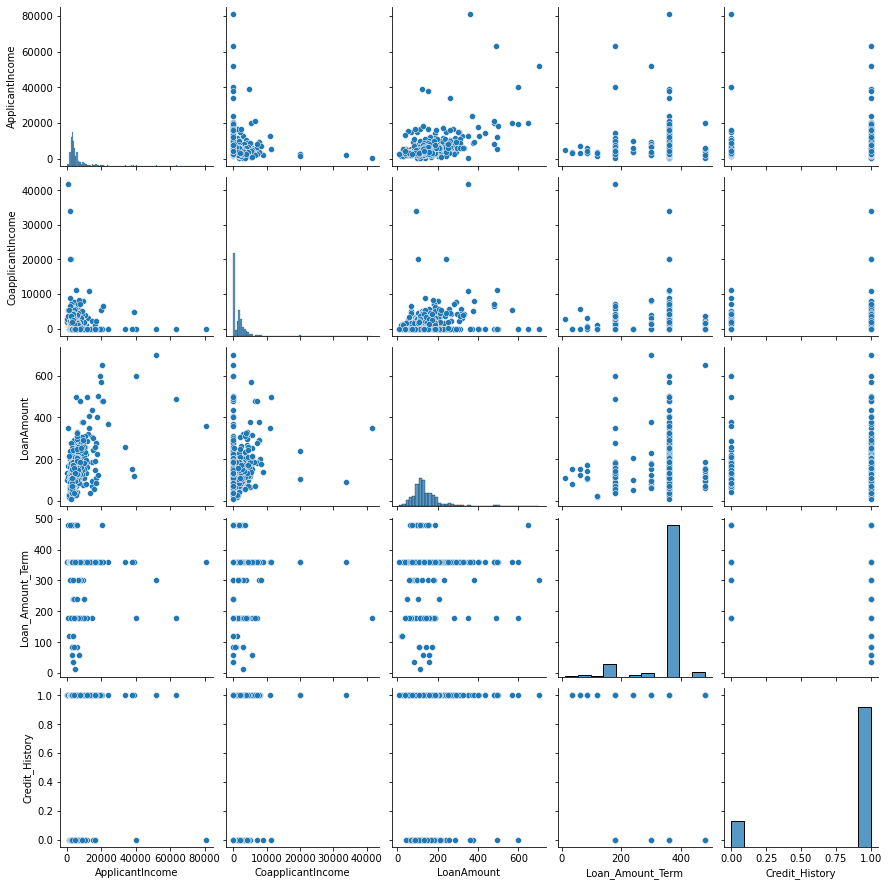

In [11]:
sns.pairplot(data);

In [12]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

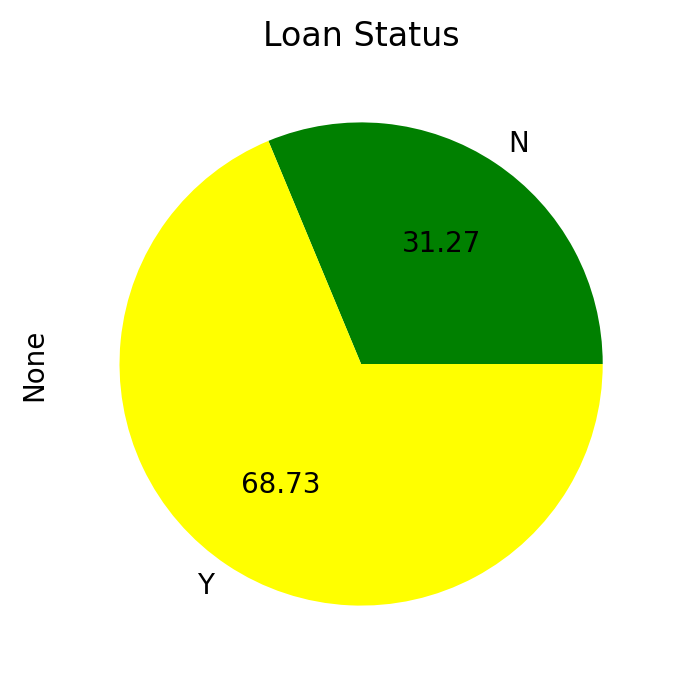

In [13]:
plt.figure(figsize=(8,4),dpi=200)
data.groupby('Loan_Status').size().plot(kind='pie', autopct='%.2f', colors=['green', 'yellow'], title="Loan Status");

In [14]:
data.groupby('Self_Employed').size()

Self_Employed
No     500
Yes     82
dtype: int64

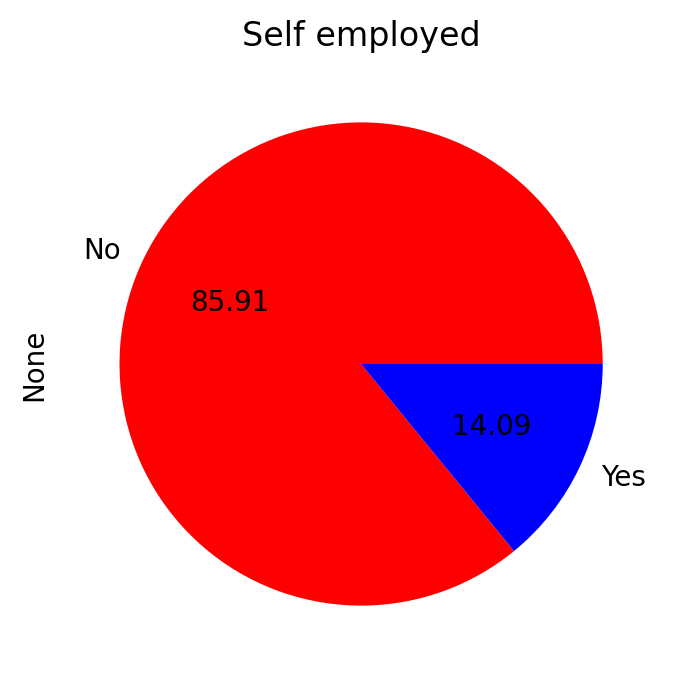

In [15]:
# pie chart of selfemployed 
plt.figure(figsize=(8,4),dpi=200)
data.groupby('Self_Employed').size().plot(kind='pie', autopct='%.2f', colors=['red', 'blue'], title="Self employed");

#### Data Visualization using piechart and countplot for categorical attributes (columns).

In [16]:
data.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

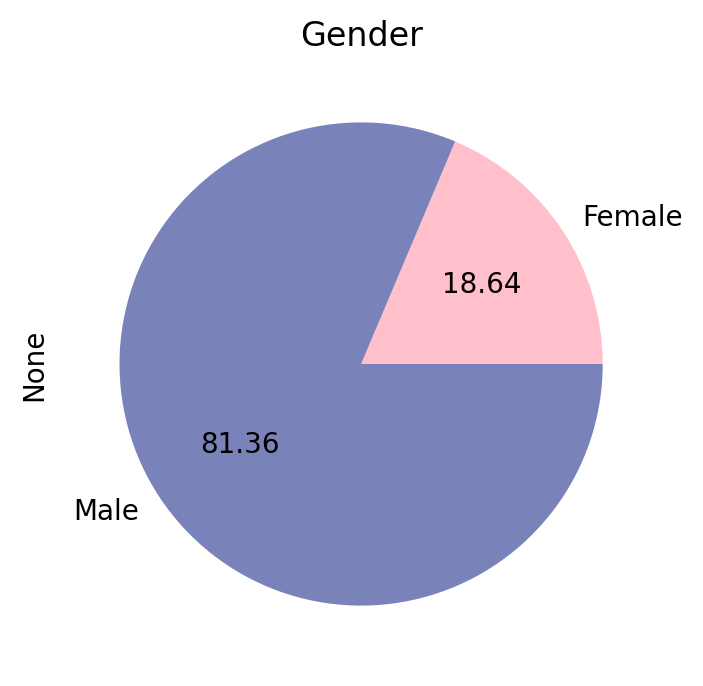

In [17]:
# pie chart of gender 
plt.figure(figsize=(10,4),dpi=200)
data.groupby('Gender').size().plot(kind='pie', autopct='%.2f', colors=['pink', '#7982B9'], title="Gender");

In [18]:
data.groupby('Gender').size()

Gender
Female    112
Male      489
dtype: int64

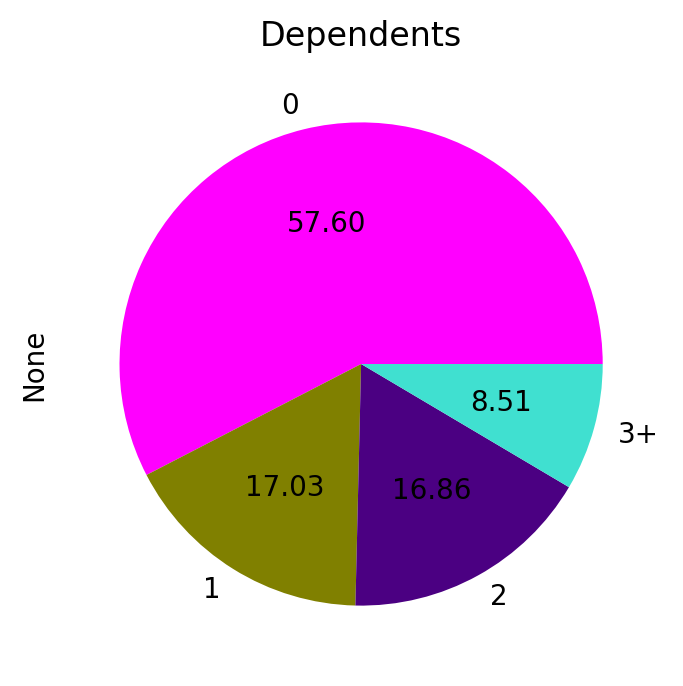

In [19]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('Dependents').size().plot(kind='pie', autopct='%.2f',colors=['magenta', 'olive', 'indigo', 'turquoise'] , title="Dependents");

In [20]:
data.groupby('Married').size()

Married
No     213
Yes    398
dtype: int64

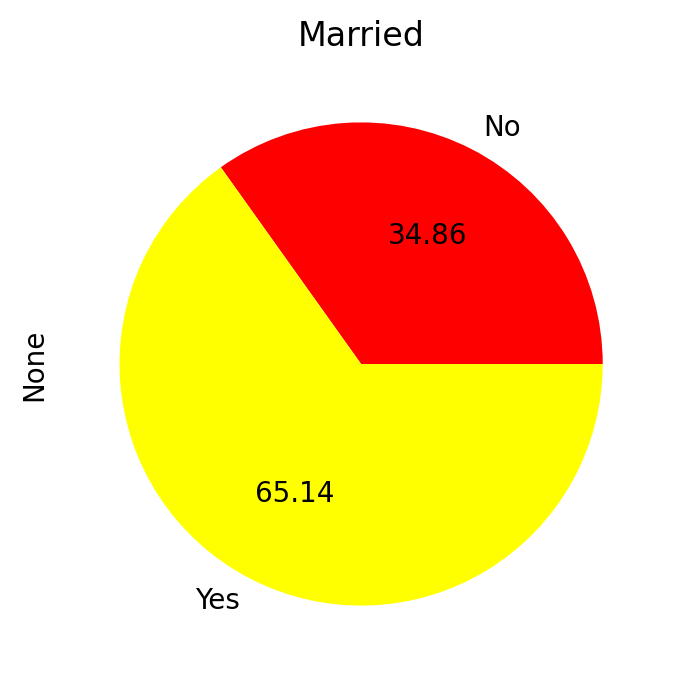

In [21]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('Married').size().plot(kind='pie', autopct='%.2f', colors=['red', 'yellow'], title="Married");

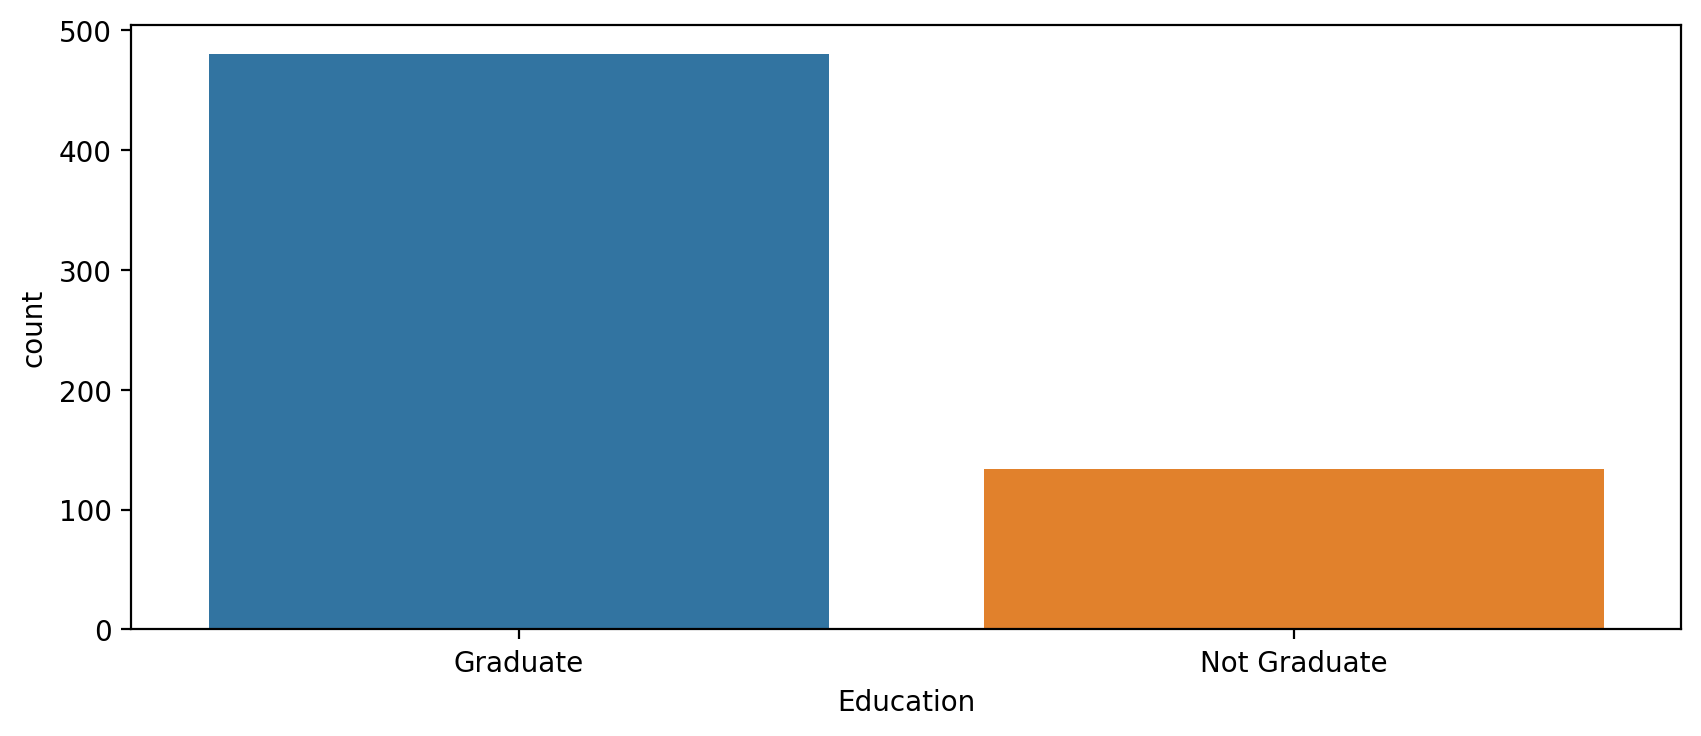

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='Education',data=data);

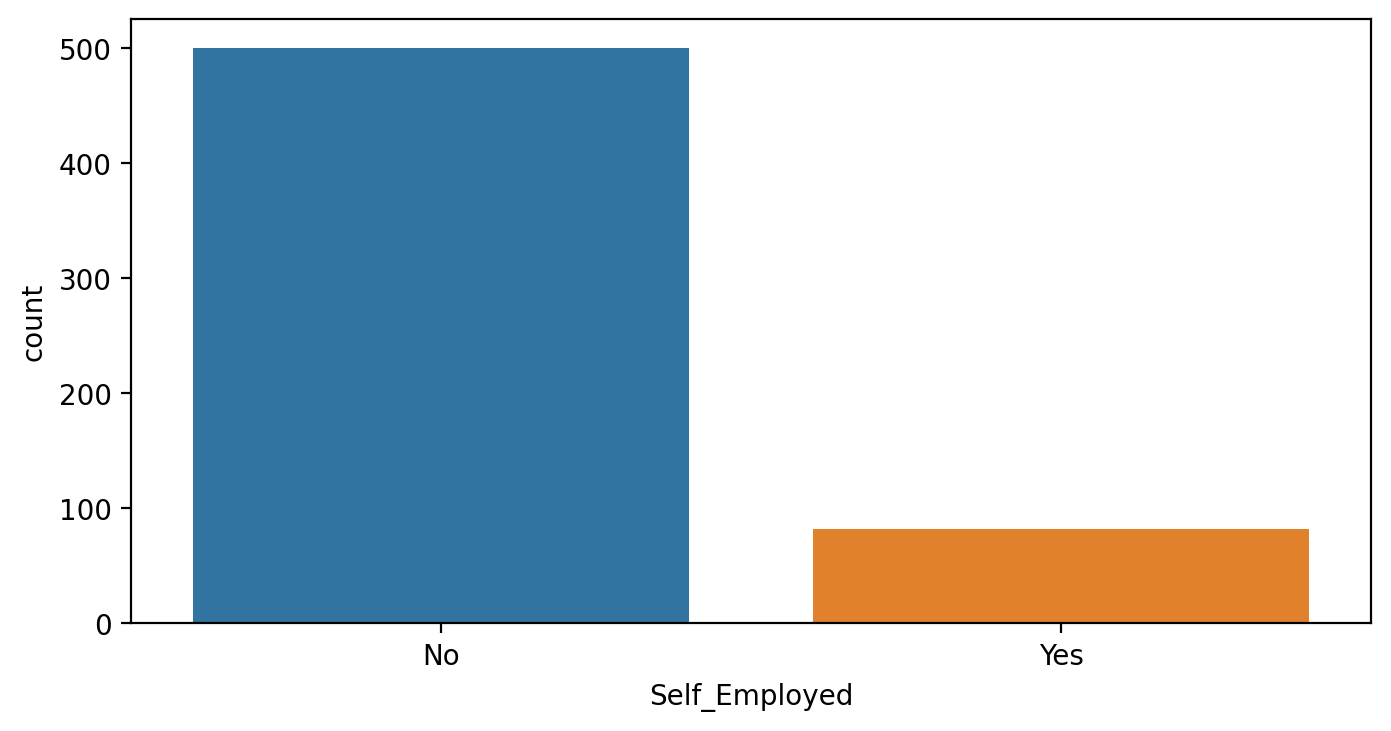

In [23]:
plt.figure(figsize=(8,4),dpi=200)
sns.countplot(x='Self_Employed',data=data);

In [24]:
data.groupby('Property_Area').size()

Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

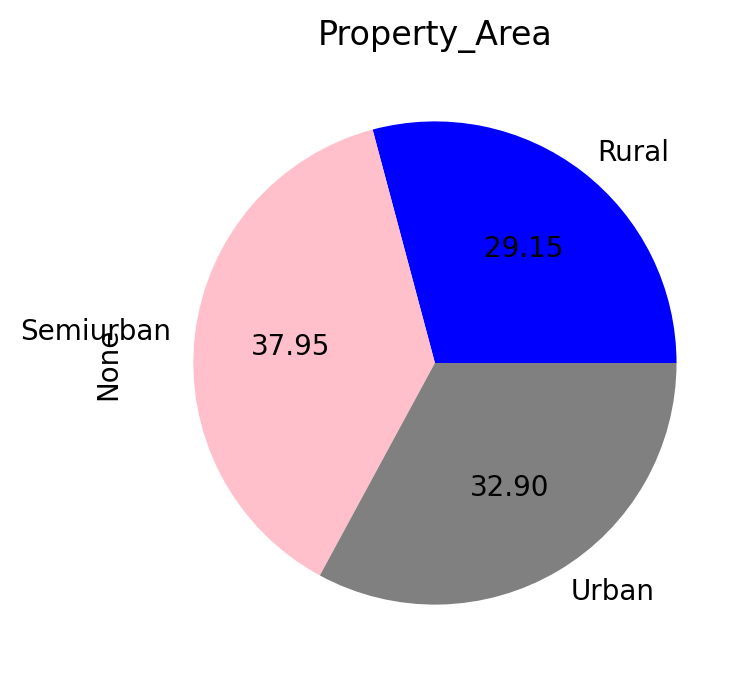

In [25]:
plt.figure(figsize=(10,4),dpi=200)
data.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f', colors=['blue', 'pink', 'gray'], title="Property_Area");

## Categorical Independent Variable vs Target Variable

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


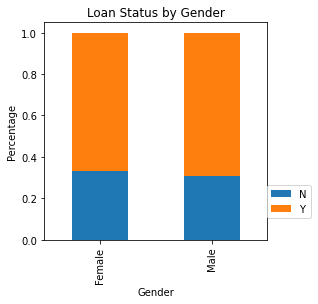

In [26]:
#Relation between "Loan_Status" and "Gender"
print(pd.crosstab(data["Gender"], data["Loan_Status"]))
# Crosstabulation between "Gender" and "Loan_Status"
gender_loan_crosstab = pd.crosstab(data["Gender"], data["Loan_Status"])

# Calculate the percentage and plot the stacked bar chart
gender_loan_percentage = gender_loan_crosstab.div(gender_loan_crosstab.sum(1).astype(float), axis=0)
gender_loan_percentage.plot(kind="bar", stacked=True, figsize=(4, 4))

plt.legend(loc=(1,0.1))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Loan Status by Gender")

# Display the plot
plt.show()


Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


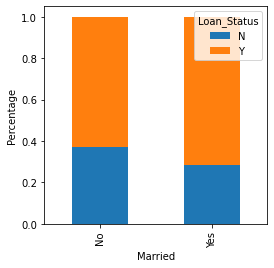

In [27]:
#Relation between "Loan_Status" and "Married"
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


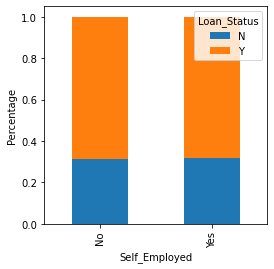

In [28]:
#Relation between "Loan_Status" and "Self_Employed"
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))
SelfEmployed = pd.crosstab(data["Self_Employed"],data["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


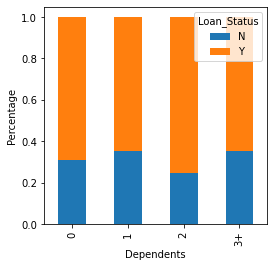

In [29]:
#Relation between "Loan_Status" and "Dependents"
print(pd.crosstab(data['Dependents'],data["Loan_Status"]))
Dependents = pd.crosstab(data['Dependents'],data["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


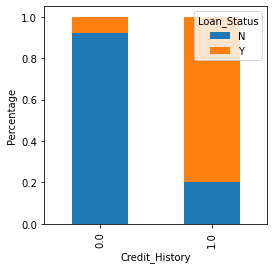

In [30]:
#Relation between "Loan_Status" and "Credit_History"
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))
CreditHistory = pd.crosstab(data["Credit_History"],data["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


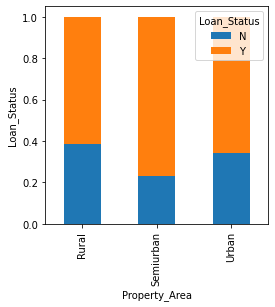

In [31]:
#Relation between "Loan_Status" and "Property_Area"
print(pd.crosstab(data["Property_Area"],data["Loan_Status"]))
PropertyArea = pd.crosstab(data["Property_Area"],data["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

#### Matrix form for correlation data "Heatmap"

<AxesSubplot:>

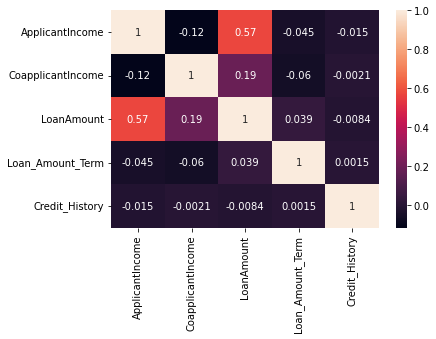

In [32]:
data.corr()
sns.heatmap(data.corr(),annot=True)

#### To understand the correlation present between applicant income and Loan amount we will use scutter plot between the two

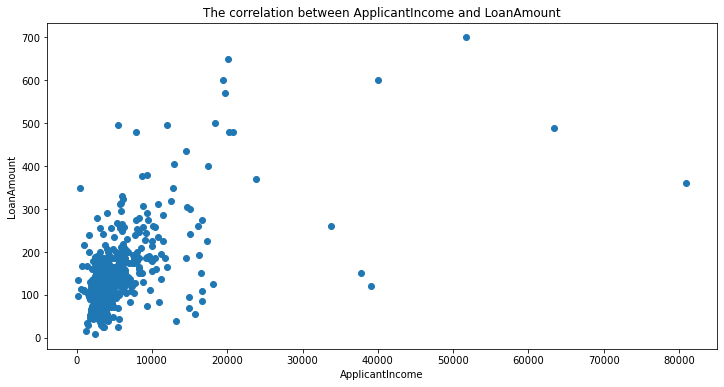

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(x='ApplicantIncome',y='LoanAmount',data=data)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('The correlation between ApplicantIncome and LoanAmount')
plt.show()

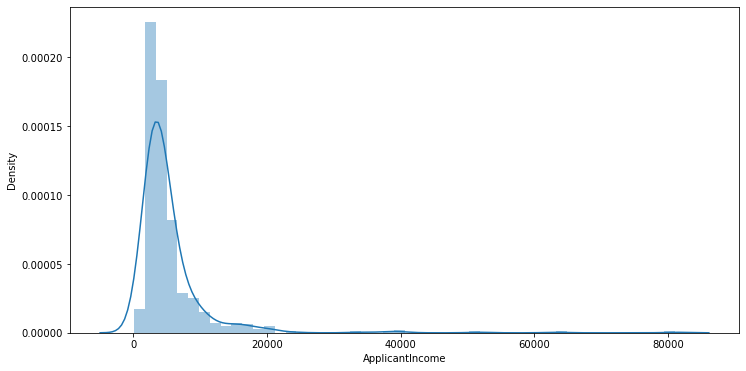

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(data["ApplicantIncome"]);

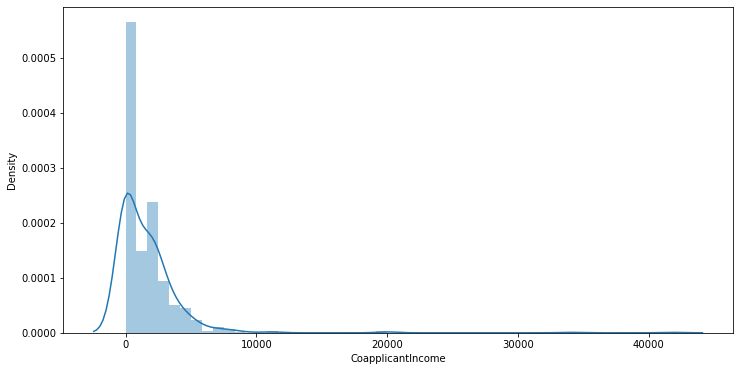

In [35]:
plt.figure(figsize=(12,6))
sns.distplot(data["CoapplicantIncome"]);

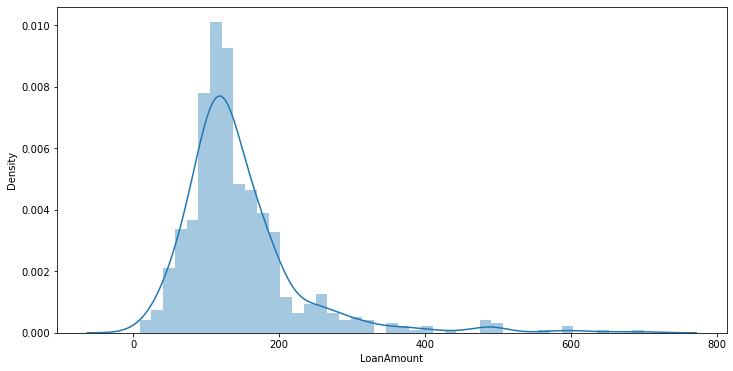

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(data["LoanAmount"]);

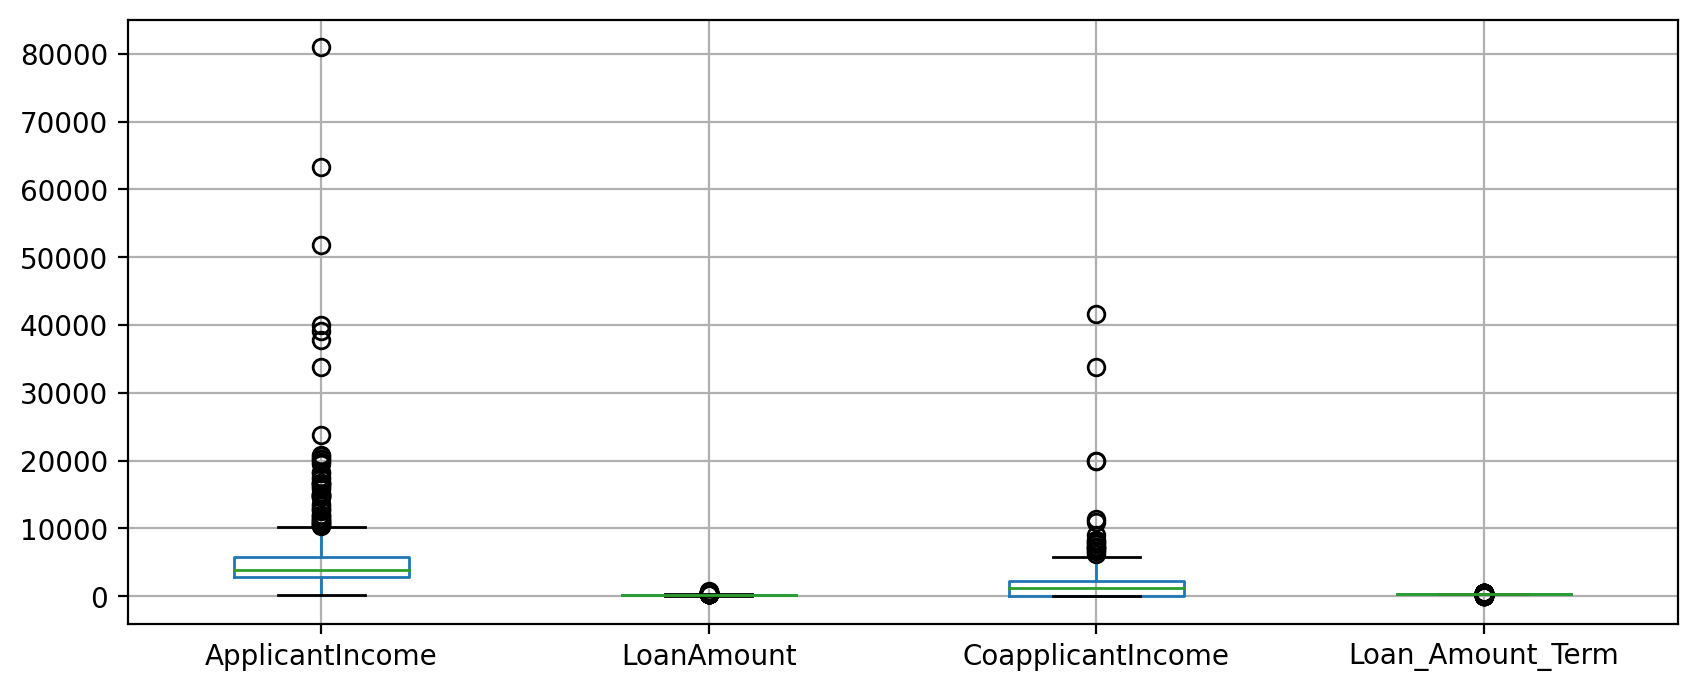

In [37]:
##Checking the Outliers in some of the numerical attributes
plt.figure(figsize=(10,4),dpi=200)
column_numeric = ['ApplicantIncome','LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term']
data.boxplot(column_numeric);

#### Check the nulls in data

In [38]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Handle categorical missing data
- We replace missing data with mode 

In [39]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

#### Handle numerical missing data
- We replace missing data with median

In [40]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [41]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
data.shape

(614, 13)

#### Here we applied log tranformation to deal with outliers

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

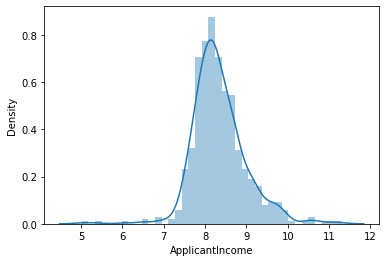

In [44]:
data["ApplicantIncome"]=np.log(data["ApplicantIncome"])
sns.distplot(data["ApplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

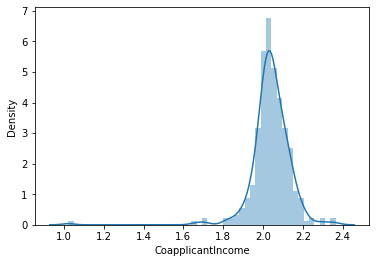

In [46]:
data["CoapplicantIncome"]=np.log(data["CoapplicantIncome"])
sns.distplot(data["CoapplicantIncome"].dropna())

In [47]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64


- As we can see, we removed the outliers .. now we must replace these null values with median

In [48]:

data['CoapplicantIncome'] = data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].median())

In [49]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [50]:
data.shape

(614, 13)

## creating a model that fits the data

#### Convert the categorical data into numerical data


In [51]:
# Label Encode The Target Variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [52]:
# Ordinal Encode The features
enc = OrdinalEncoder() 
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']] = enc.fit_transform(data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status', 'Dependents']])
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,0.0,0.0,8.674026,2.038703,128.0,360.0,1.0,2.0,1.0
1,LP001003,1.0,1.0,1.0,0.0,0.0,8.430109,1.990411,128.0,360.0,1.0,0.0,0.0
2,LP001005,1.0,1.0,0.0,0.0,1.0,8.006368,2.038703,66.0,360.0,1.0,2.0,1.0
3,LP001006,1.0,1.0,0.0,1.0,0.0,7.856707,2.049700,120.0,360.0,1.0,2.0,1.0
4,LP001008,1.0,0.0,0.0,0.0,0.0,8.699515,2.038703,141.0,360.0,1.0,2.0,1.0


#### Splitting it into dependence and independence variables (Target and Features)

In [53]:
x=data.drop(columns=['Loan_ID','Loan_Status'])
y=data['Loan_Status']

#### Splitting the data into training data and testing data
- I am going to split the data into two parts one for training and and one for testing for each of Target and features

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [55]:
print(x_train.shape)

(429, 11)


In [56]:
print(x_test.shape)

(185, 11)


### Data Scaling


In [66]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression Model


In [67]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predict = LR.predict(x_test)
print(classification_report(y_test, predict))
LRAcc = accuracy_score(predict,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

         0.0       0.92      0.43      0.59        51
         1.0       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

Logistic Regression accuracy is: 83.24%


### Confusion Matrix


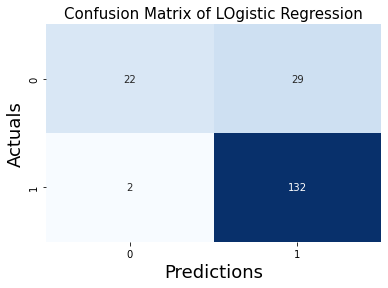

In [68]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(y_test, predict)
#plt.figure(figsize=(3.5, 3.5),dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of LOgistic Regression', fontsize=15)
plt.show()

# SVC Model

In [69]:
svc = SVC(kernel="linear")
svc.fit(x_train,y_train)
predict_svc = svc.predict(x_test)
print(classification_report(y_test, predict_svc))
SVCAcc = accuracy_score(predict_svc,y_test)
print('SVC model accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185

SVC model accuracy is: 82.70%


### Confusion Matrix for SVC Model

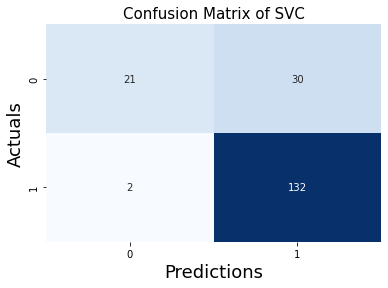

In [70]:

cm = metrics.confusion_matrix(y_test, predict_svc)
#plt.figure(figsize=(3.5, 3.5),dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of SVC', fontsize=15)
plt.show()


# Random Forest Model

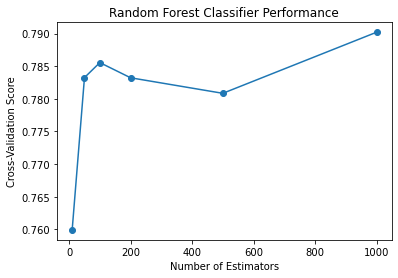

In [71]:
from sklearn.model_selection import cross_val_score


n_estimators_values = [10, 50, 100, 200, 500, 1000]  # Define a range of values for n_estimators
cv_scores = []

for n in n_estimators_values:
    clf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(clf, x_train, y_train, cv=5)  # Perform 5-fold cross-validation
    cv_scores.append(scores.mean())

# Plot the cross-validation scores
plt.plot(n_estimators_values, cv_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validation Score')
plt.title('Random Forest Classifier Performance')
plt.show()


In [72]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(x_train,y_train)
y_pred_rf=clf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
rfAcc = accuracy_score(y_pred_rf,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(rfAcc*100))

              precision    recall  f1-score   support

         0.0       0.77      0.47      0.59        51
         1.0       0.82      0.95      0.88       134

    accuracy                           0.82       185
   macro avg       0.80      0.71      0.73       185
weighted avg       0.81      0.82      0.80       185

ID3 model accuracy is: 81.62%


### Confusion Matrix for Random Forest

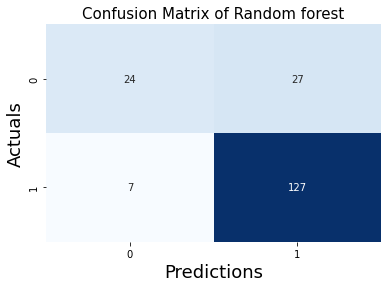

In [73]:
cm = metrics.confusion_matrix(y_test, y_pred_rf)
#plt.figure(figsize=(3.5, 3.5),dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Random forest', fontsize=15)
plt.show()

## Balancing imbalance data

#### Load Logistic Regression model with Pickle

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_oversampled, y_oversampled = smote.fit_resample(x, y)

In [77]:

# Combine oversampled features and target variable into a DataFrame
oversampled_data = pd.concat([pd.DataFrame(x_oversampled, columns=x.columns),
                              pd.Series(y_oversampled, name='Loan_Status')], axis=1)

# Display the value counts of the predicted variable
print(oversampled_data['Loan_Status'].value_counts())


1.0    422
0.0    422
Name: Loan_Status, dtype: int64


Hence we can see data is balanced

In [78]:
#scaling
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x_oversampled)

In [79]:

# Split the scaled and oversampled data into training and testing sets
x_btrain, x_btest, y_btrain, y_btest = train_test_split(x_scaled, y_oversampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", x_btrain.shape, y_btrain.shape)
print("Testing set shape:", x_btest.shape, y_btest.shape)


Training set shape: (675, 11) (675,)
Testing set shape: (169, 11) (169,)


# Logistic Regression Model on balanced data

In [80]:

B_LR = LogisticRegression()

B_LR.fit(x_btrain, y_btrain)

B_predict = B_LR.predict(x_btest)

print(classification_report(y_btest, B_predict))

B_LRAcc = accuracy_score(y_btest, B_predict)
print('Balanced Logistic Regression accuracy is: {:.2f}%'.format(B_LRAcc * 100))


              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69        94
         1.0       0.62      0.93      0.75        75

    accuracy                           0.72       169
   macro avg       0.77      0.74      0.72       169
weighted avg       0.78      0.72      0.72       169

Balanced Logistic Regression accuracy is: 72.19%


# SVC Model on balanced data

In [86]:
B_svc = SVC(kernel="linear")
B_svc.fit(x_btrain,y_btrain)
predict_Bsvc = svc.predict(x_btest)
print(classification_report(y_btest, predict_Bsvc))
B_SVCAcc = accuracy_score(predict_Bsvc,y_btest)
print('SVC model accuracy is: {:.2f}%'.format(B_SVCAcc*100))

              precision    recall  f1-score   support

         0.0       0.95      0.43      0.59        94
         1.0       0.57      0.97      0.72        75

    accuracy                           0.67       169
   macro avg       0.76      0.70      0.66       169
weighted avg       0.78      0.67      0.65       169

SVC model accuracy is: 66.86%



# Load the Logestic Regresssion Model using pickle


In [74]:
file = "loan_predition_model_LR.pkl"  
pickle.dump(LR, open(file, 'wb'))

loaded_model = pickle.load(open(file, 'rb'))

pred_Y = loaded_model.predict(x_test)
result = np.round(accuracy_score(y_test, predict) ,2)
print(result)

0.83


# Conclusion :
##### From previos code we will notice we've chose Logistic Regression model to load and that because this model make the best prediction as the accuracy of it is the highest.